In [54]:
#build PCA


# why do we do dimensionality reduction
#reason 1: Space efficiency
# reason 2:  Computing Efficiency
# reason 3: Visualization , we can not visuallize dimesions or features

# we will build PCA and compare it against the T-SNE and LDA (3 DR methods total)

In [55]:
import numpy as np
np.random.seed(1) # for debugging

In [56]:
# step 1: Create our dataset
mu_vec1 = np.array([0,0,0]) # sample mean
cov_mat1 = np.array([[1,0,0], [0,1,0], [0,0,1]]) # sample covariance(how much one variable vary with pother values.
#) How much do you want distribute from mean. Gaussian distribution. 

class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20).T
print(class1_sample)

#3 x 20 Matrix. Tensor is three dimentional array

[[ 1.62434536 -1.07296862  1.74481176 -0.24937038 -0.3224172  -1.09989127
   0.04221375  1.14472371  0.90085595 -0.93576943 -0.69166075 -0.84520564
  -1.11731035  0.74204416 -0.74715829 -0.63699565  0.12015895 -0.35224985
  -0.20889423  0.93110208]
 [-0.61175641  0.86540763 -0.7612069   1.46210794 -0.38405435 -0.17242821
   0.58281521  0.90159072 -0.68372786 -0.26788808 -0.39675353 -0.67124613
   0.2344157  -0.19183555  1.6924546   0.19091548  0.61720311 -1.1425182
   0.58662319  0.28558733]
 [-0.52817175 -2.3015387   0.3190391  -2.06014071  1.13376944 -0.87785842
  -1.10061918  0.50249434 -0.12289023  0.53035547 -0.6871727  -0.0126646
   1.65980218 -0.88762896  0.05080775  2.10025514  0.30017032 -0.34934272
   0.83898341  0.88514116]]


In [57]:
# step 1: Create our second dataset
mu_vec2 = np.array([0,0,0]) # sample mean
cov_mat2 = np.array([[1,0,0], [0,1,0], [0,0,1]]) # sample covariance(how much one variable vary with pother values.
#) How much do you want distribute from mean. Gaussian distribution. 

class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20).T
print(class2_sample)

[[-0.75439794 -0.29809284  1.13162939 -1.39649634  0.16003707 -2.02220122
   0.23009474 -0.20075807  0.19829972  0.37756379  1.19891788 -0.63873041
  -0.34385368  0.69803203  0.40349164  0.16938243 -0.26621851  0.31515939
   0.35054598 -1.61577235]
 [ 1.25286816  0.48851815  1.51981682 -1.44411381  0.87616892 -0.30620401
   0.76201118  0.18656139  0.11900865  0.12182127  0.18515642  0.42349435
   0.04359686 -0.44712856  0.59357852  0.74055645  0.03261455  0.84616065
  -1.31228341  1.12141771]
 [ 0.51292982 -0.07557171  2.18557541 -0.50446586  0.31563495  0.82797464
  -0.22232814  0.41005165 -0.67066229  1.12948391 -0.37528495  0.07734007
  -0.62000084  1.2245077  -1.09491185 -0.9537006  -1.37311732 -0.85951594
  -0.03869551  0.40890054]]


Populating the interactive namespace from numpy and matplotlib


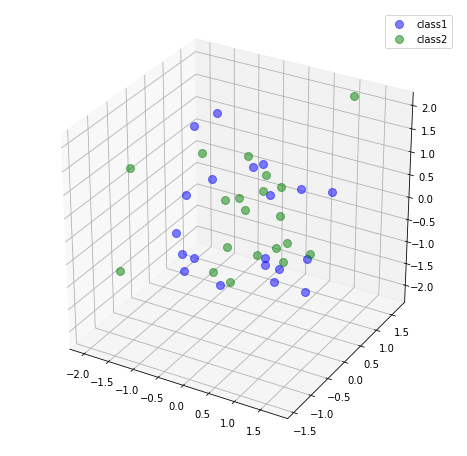

In [58]:
%pylab inline

# step 2 -plot the data
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt

# figure, widthe and height
fig = plt.figure(figsize=(8,8))

#3d subplot
#these are sublot grid parameters encodes as s single integet
ax = fig.add_subplot(111, projection='3d')
#z = Axes3D(fig)

#fontzie
plt.rcParams['legend.fontsize'] = 10

#plot samples
ax.plot(class1_sample[0,:], class1_sample[1,:], class1_sample[2,:], 'o', markersize=8
       , color='blue', alpha = 0.5, label='class1')
ax.plot(class2_sample[0,:], class2_sample[1,:], class2_sample[2,:], 'o', markersize=8
       , color='green', alpha = 0.5, label='class2')

ax.legend(loc='upper right')

plt.show()

In [59]:
#Step 3: merge the data into one big dataset

In [60]:
all_samples = np.concatenate((class1_sample, class2_sample), axis=1)
all_samples

array([[ 1.62434536, -1.07296862,  1.74481176, -0.24937038, -0.3224172 ,
        -1.09989127,  0.04221375,  1.14472371,  0.90085595, -0.93576943,
        -0.69166075, -0.84520564, -1.11731035,  0.74204416, -0.74715829,
        -0.63699565,  0.12015895, -0.35224985, -0.20889423,  0.93110208,
        -0.75439794, -0.29809284,  1.13162939, -1.39649634,  0.16003707,
        -2.02220122,  0.23009474, -0.20075807,  0.19829972,  0.37756379,
         1.19891788, -0.63873041, -0.34385368,  0.69803203,  0.40349164,
         0.16938243, -0.26621851,  0.31515939,  0.35054598, -1.61577235],
       [-0.61175641,  0.86540763, -0.7612069 ,  1.46210794, -0.38405435,
        -0.17242821,  0.58281521,  0.90159072, -0.68372786, -0.26788808,
        -0.39675353, -0.67124613,  0.2344157 , -0.19183555,  1.6924546 ,
         0.19091548,  0.61720311, -1.1425182 ,  0.58662319,  0.28558733,
         1.25286816,  0.48851815,  1.51981682, -1.44411381,  0.87616892,
        -0.30620401,  0.76201118,  0.18656139,  0.

In [61]:
all_samples.T

array([[ 1.62434536, -0.61175641, -0.52817175],
       [-1.07296862,  0.86540763, -2.3015387 ],
       [ 1.74481176, -0.7612069 ,  0.3190391 ],
       [-0.24937038,  1.46210794, -2.06014071],
       [-0.3224172 , -0.38405435,  1.13376944],
       [-1.09989127, -0.17242821, -0.87785842],
       [ 0.04221375,  0.58281521, -1.10061918],
       [ 1.14472371,  0.90159072,  0.50249434],
       [ 0.90085595, -0.68372786, -0.12289023],
       [-0.93576943, -0.26788808,  0.53035547],
       [-0.69166075, -0.39675353, -0.6871727 ],
       [-0.84520564, -0.67124613, -0.0126646 ],
       [-1.11731035,  0.2344157 ,  1.65980218],
       [ 0.74204416, -0.19183555, -0.88762896],
       [-0.74715829,  1.6924546 ,  0.05080775],
       [-0.63699565,  0.19091548,  2.10025514],
       [ 0.12015895,  0.61720311,  0.30017032],
       [-0.35224985, -1.1425182 , -0.34934272],
       [-0.20889423,  0.58662319,  0.83898341],
       [ 0.93110208,  0.28558733,  0.88514116],
       [-0.75439794,  1.25286816,  0.512

In [62]:
#step 4 - Compute the dimensional Mean Vector, it will help compute the covariance matrix
# mean for each feature
mean_x = np.mean(all_samples[0,:])
mean_y = np.mean(all_samples[1,:])
mean_z = np.mean(all_samples[2,:])

#3d mean vector
mean_vector = np.array(([mean_x], [mean_y], [mean_z]))
print(mean_vector)

[[-0.08332508]
 [ 0.19848315]
 [-0.00757665]]


In [63]:
# Step 5: Compute covariance matrix. 
#Covariance is the degree between two random variables change with each other. 
#Difference between two features
cov_mat = np.zeros((3,3))

for i in range((all_samples.shape[1])):
    cov_mat += (all_samples[:,i].reshape(3,1) - mean_vector).dot((all_samples[:,i].reshape(3,1) - mean_vector).T)
print("covariance matrix:\n", cov_mat)

covariance matrix:
 [[ 29.76153645  -0.68921948   1.31864917]
 [ -0.68921948  22.56859819  -0.32364752]
 [  1.31864917  -0.32364752  38.82461287]]


In [64]:
# Step 6 : To compute the eigen vector and eigenvalues. 
# Understanding the transformation easy. they all the axis, egienvalues give values byt which this comprtrasnformation occur.
# sense of direction where the data is going
eig_val, eig_vec = np.linalg.eig(cov_mat)

print("eigen values:")
print(eig_val) # magnitude of direction
print("\neigen_vectors:")
print(eig_vec) # direction

eigen values:
[ 39.02320339  29.63081801  22.50072611]

eigen_vectors:
[[ 0.14276533 -0.98544534  0.09227969]
 [-0.02544109  0.08955022  0.99565733]
 [ 0.98942954  0.14449304  0.01228614]]


In [65]:
#step 7: create eigenpair from both and sort them

# make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_val[i]), eig_vec[:,i])
             for i in range(len(eig_val))]

# sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

#Visually confirm that the list is correctly sorted by decresing eigenvalues

for i in eig_pairs:
    print(i[0])

39.0232033898
29.63081801
22.5007261085


In [66]:
# step 8: Choose the k eigenvectors
# stack arrays in sequence horizontally - hstack
matrix_w = np.hstack((eig_pairs[0][1].reshape(3,1), eig_pairs[1][1].reshape(3,1)))

print('Matrix W:\n', matrix_w)

Matrix W:
 [[ 0.14276533 -0.98544534]
 [-0.02544109  0.08955022]
 [ 0.98942954  0.14449304]]


In [67]:
# step 9: tranform our data using the eigenpair matrix
transformed = matrix_w.T.dot(all_samples)
print( "transformed:\n", transformed)

transformed:
 [[-0.27512478 -2.45241     0.58413126 -2.11116313  1.08552574 -1.02121863
  -1.09778592  0.63767215  0.02441456  0.3979693  -0.7685603  -0.11611956
   1.47678033 -0.76742763 -0.09945549  1.98225648  0.29844959 -0.36687217
   0.78536779  1.00144826  0.36793172 -0.12975864  2.28536451 -0.66176486
   0.31285559  0.53831251 -0.20651487  0.3723096  -0.63829046  1.16834849
  -0.20486469 -0.02544017 -0.66364668  1.3225943  -1.04083479 -0.93827817
  -1.39743936 -0.82696387  0.04514525  0.14537191]
 [-1.73180363  0.80229304 -1.74148394  0.07899696  0.44715418  0.94159731
  -0.14843992 -0.97471807 -0.96672906  0.97479287  0.54677283  0.77096378
   1.36187012 -0.87667908  0.8951847   0.94829317 -0.01976689  0.19433263
   0.37961335 -0.76407906  0.92972734  0.32658151 -0.66325855  1.1739583
  -0.03363962  2.08498471 -0.19063239  0.27379233 -0.28166232 -0.19795679
  -1.21911331  0.67853302  0.2531673  -0.55098003 -0.50267102 -0.23840324
   0.06685853 -0.35899256 -0.4685504   1.7517618

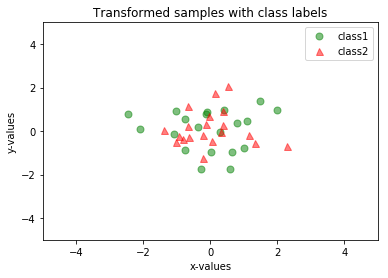

In [68]:
# Plot the data
plt.plot(transformed[0, 0: 20], transformed[1, 0:20], 'o', markersize=7, color='green', alpha=0.5
        , label='class1')
plt.plot(transformed[0, 20:40], transformed[1, 20:40], '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlim([-5,5])
plt.ylim([-5,5])
plt.xlabel('x-values')
plt.ylabel('y-values')
plt.legend()
plt.title('Transformed samples with class labels')

plt.show()

In [ ]:
# compare PCA vs T-SNE vs LDA
# 3 most popular Data Reduction Techniques

# Best Generic DR method(generally for unsupervised): PCA ()

# best generic DR method(generally for supervised data): LDA( Linear discriminant analysis)

#  LDA: Same as PCA except we compute mean vector for each of the classes)

# best visualization : T-SNE

# Step 1: Compute similarity matrix between all feature vectors
# Step 2: Compute similarity matrix from map points
# Step 3: Use gradient descent to minimize distance between matrices

# Oreilly page